In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
def isfloat(s):
    try :
        float(s)
        return True
    except:
        return False

data_frame=pd.read_csv("fashion_data_set.csv")
cutted=data_frame.loc[:,['price_ori', 'item_rating', 'price_actual', 'total_rating',
       'total_sold', 'favorite', 'fees']]


In [5]:
cutted.corr()

,price_ori,item_rating,price_actual,total_rating,total_sold,favorite,fees
price_ori,1.000000,0.012047,0.750852,-0.035400,-0.032078,-0.019715,0.094194
item_rating,0.012047,1.000000,0.021911,0.031148,0.022489,0.012132,-0.002679
price_actual,0.750852,0.021911,1.000000,-0.046900,-0.035857,-0.023882,0.120750
total_rating,-0.035400,0.031148,-0.046900,1.000000,0.666050,0.649763,-0.029119
total_sold,-0.032078,0.022489,-0.035857,0.666050,1.000000,0.977353,-0.019287
favorite,-0.019715,0.012132,-0.023882,0.649763,0.977353,1.000000,-0.012435
fees,0.094194,-0.002679,0.120750,-0.029119,-0.019287,-0.012435,1.000000


,Type of product,price_ori,item_rating,price_actual,total_rating,total_sold,favorite,fees
0,baby & toys,19083.98,5046.3,15363.98,482426.0,1319339.0,868326.0,123.485
1,fashion accessories,80700.48,5786.5,67002.76,148249.0,635478.0,346580.0,323.525
2,men's bags & wallets,24826.79,2147.6,13437.00,458398.0,907924.0,700995.0,54.175
3,men's clothing,126308.02,9006.9,99579.15,114094.0,274169.0,227795.0,838.650
4,men's shoes,6290.96,568.8,4667.67,27944.0,52882.0,51999.0,28.620
5,muslim fashion,38502.65,6166.1,25537.24,313049.0,881085.0,759065.0,183.600
6,sports & outdoor,208.85,24.1,155.16,2220.0,3802.0,2668.0,0.000
7,watches,409421.66,17439.1,238746.46,290603.0,719057.0,536250.0,1490.840
8,women clothes,156.03,19.6,135.88,98.0,230.0,320.0,0.820
9,women's bags,63522.91,6190.3,36329.13,504543.0,1670467.0,1409354.0,350.180


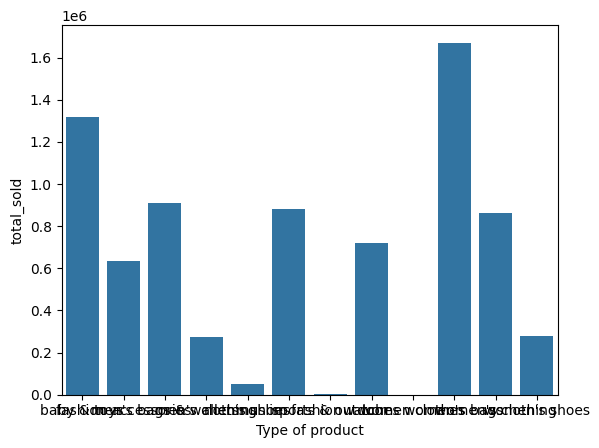

In [6]:
new_set=data_frame[['price_ori','item_rating','price_actual','total_rating','total_sold','favorite','Type of product', 'fees']]
grouped = new_set.groupby('Type of product').agg('sum').reset_index()
sns.barplot(data=grouped, x='Type of product', y='total_sold')
grouped

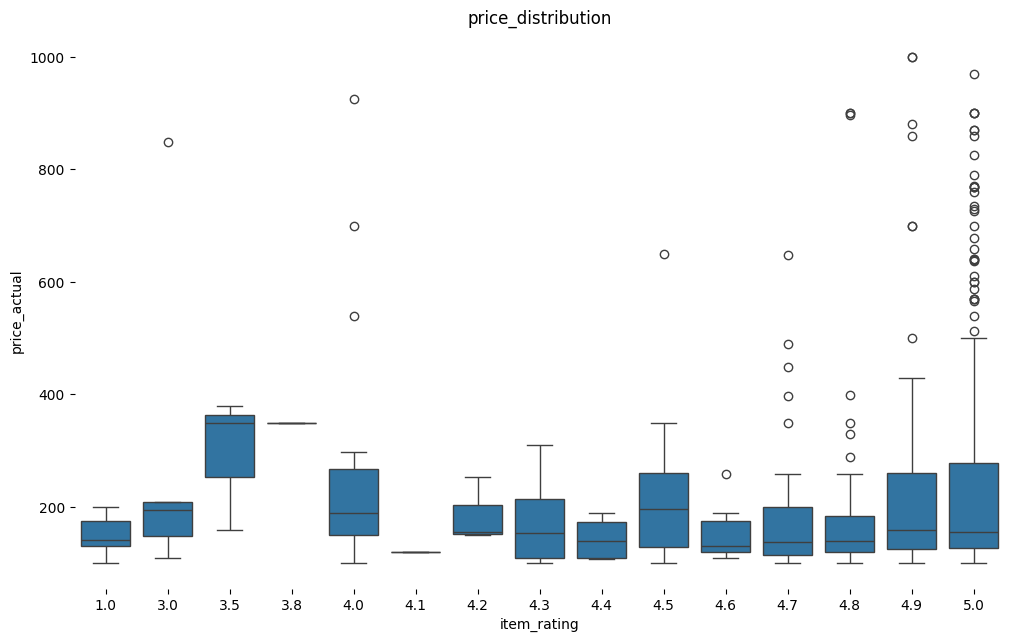

In [7]:
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Ensure loc is initialized
loc = 0  

def on_click(event=None):
    global loc
    loc = (loc + 1) % 5
    ax.cla()

    if loc == 0:
        sns.heatmap(new_set.isnull(), cbar=False, yticklabels=False, ax=ax)
        plt.title("missing data")
    if loc == 1:
        grouped = new_set.groupby('Type of product').agg('sum').reset_index()
        sns.barplot(data=grouped, x='Type of product', y='total_sold', ax=ax)
        plt.title("volume sold")
    if loc == 2:
        sns.boxplot(data=new_set[(new_set['price_actual']<100) ], x='item_rating', y='price_actual', ax=ax)
        plt.title("price_distribution")
    if loc==3:
        sns.boxplot(data=new_set[(new_set['price_actual']>=100) & (new_set['price_actual']<1000) ], x='item_rating', y='price_actual', ax=ax)
        plt.title("price_distribution")
    if loc==4:
        sns.boxplot(data=new_set[(new_set['price_actual']>=1000) ], x='item_rating', y='price_actual', ax=ax)
        plt.title("price_distribution")
    canvas.draw()


# Initialize the Tkinter window
app_test_null = tk.Tk()
app_test_null.title("Missing Data")

# Create Matplotlib figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
button = tk.Button(app_test_null, text="Next Plot", command=on_click)
button.pack()
# Create the canvas to embed the Matplotlib figure
canvas = FigureCanvasTkAgg(fig, master=app_test_null)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
# Initial plot (Seaborn heatmap)
sns.heatmap(new_set.isnull(), cbar=False, yticklabels=False, ax=ax)
canvas.draw()



# Start the Tkinter event loop
app_test_null.mainloop()
